In [1]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import itertools
import time
np.set_printoptions(suppress=True)

FS=7

In [2]:
import fly_plot_lib.plot as fpl

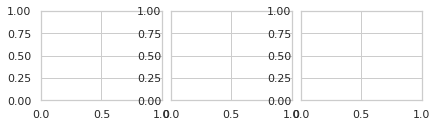

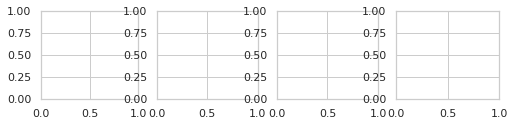

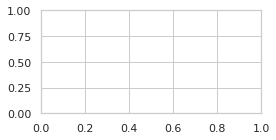

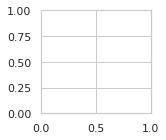

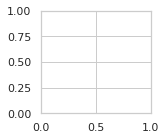

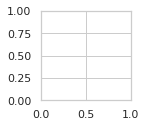

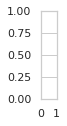

In [3]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/fig6.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

### Panel R2

In [4]:
dir='~/DataAnalysis/Figure/Fig6Assets/'
df = pd.read_hdf(dir+'R2LtTime.h5')
line_width=0.5
msize=3
ax=layout.axes[('panelr2','a4')]
ax.grid(False)
ax.plot(df.time,df.r2_hws, label='WS>3.5m/s',linewidth=line_width,rasterized=True)
ax.plot(df.time,df.r2_hws,'o',markersize=msize,rasterized=True)

ax.plot(df.time,df.r2_lws, label='WS<3.5m/s',linewidth=line_width,rasterized=True)
ax.plot(df.time,df.r2_lws,'o',markersize=msize,rasterized=True)

ax.plot(df.time,df.r2_forest, c='black', label='Forest',linewidth=line_width,rasterized=True)
ax.plot(df.time,df.r2_forest,'o',markersize=msize,rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('Lookback Time,s')
ax.xaxis.set_label_coords(0.5, -0.1)

ax.set_ylabel('$R^2$')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left','bottom'],
                                spine_locations={'left': 5, 'bottom': 5}, 
                                smart_bounds=True,
                                xticks=[0,20],
                                yticks=[0.2,0.8],
                                linewidth=0.5)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['panelr2'], 'panelr2', cleartarget=True)
layout.write_svg('../../../Figure/fig6.svg')

### Panel 2

In [5]:
df = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/Desert/WindyTrainDf.h5")

In [6]:
ax=layout.axes[('panel2','b1')]
ax.grid(False)
dataframe=df
distance = dataframe.distance
test_var=(dataframe.mc_mean)
var1 = ax.scatter(distance,test_var, c=dataframe.mc_mean,cmap='bone_r', edgecolors='none', s=4,
                  vmin=4, vmax=10, rasterized=True)
g1 = sns.regplot(x=distance,y=(test_var) , data=dataframe,
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.set_rasterization_zorder(-20)

ax.set_xlabel('Dist. from Source,m')
ax.xaxis.set_label_coords(0.47, -0.1)

ax.set_ylabel('$\mu(mc)$')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[4.5,10.5],
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['panel2'], 'panel2', cleartarget=True)
layout.write_svg('../../../Figure/fig6.svg')


In [7]:
ax=layout.axes[('panel2','b2')]
ax.grid(False)
dataframe=df
distance = dataframe.distance
test_var=(dataframe.wf_std_dev)
var1 = ax.scatter(distance,test_var, c=dataframe.mc_mean,cmap='bone_r', edgecolors='none', s=4,
                  vmin=4, vmax=10, rasterized=True)
g1 = sns.regplot(x=distance,y=(test_var) , data=dataframe,
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)


ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\sigma(mc)$')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,2.5],
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['panel2'], 'panel2', cleartarget=True)
layout.write_svg('../../../Figure/fig6.svg')


In [8]:
ax=layout.axes[('panel2','b3')]
ax.grid(False)
dataframe=df
distance = dataframe.distance
test_var=(dataframe.wd_mean)
var1 = ax.scatter(distance,test_var, c=dataframe.mc_mean,cmap='bone_r', edgecolors='none', s=4,
                  vmin=4, vmax=10, rasterized=True)
g1 = sns.regplot(x=distance,y=(test_var) , data=dataframe,
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(wd)$')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[-2.3,1.5],
                            linewidth=0.5)

ax.set_yticklabels([r'$10^{-2.3}$',r'$10^{1.5}$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['panel2'], 'panel2', cleartarget=True)
layout.write_svg('../../../Figure/fig6.svg')


In [9]:
ax=layout.axes[('panel2','b4')]
ax.grid(False)
dataframe=df
distance = dataframe.distance
test_var=(dataframe.st_mean)
var1 = ax.scatter(distance,test_var, c=dataframe.mc_mean,cmap='bone_r', edgecolors='none', s=4,
                  vmin=4, vmax=10, rasterized=True)
g1 = sns.regplot(x=distance,y=(test_var) , data=dataframe,
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(st)$')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,2.5],
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['panel2'], 'panel2', cleartarget=True)
layout.write_svg('../../../Figure/fig6.svg')


### Panel 3

In [5]:
dir='~/DataAnalysis/Figure/Fig6Assets/'

In [11]:
df = pd.read_hdf(dir+'HWS_Rsquared.h5')

In [12]:
ax=layout.axes[('panel3','c1')]
ax.grid(False)
sns.stripplot(data=df, ax=ax, dodge=True, size=3, color='Black', rasterized=True)
ax.set_rasterization_zorder(-20)

label=['min(mc)','max(mc)','$\mu(mc)$','$\sigma(mc)$', '$mc_k$',
      'min(wf)','max(wf)','$\mu(wf)$','$\sigma(wf)$', '$wf_k$',
      'min(wd)','max(wd)','$\mu(wd)$','$\sigma(wd)$', '$wd_k$',
      'min(ma)','max(ma)','$\mu(ma)$','$\sigma(ma)$', '$ma_k$',
      'min(st)','max(st)','$\mu(st)$','$\sigma(st)$', '$st_k$']

ax.axhline(0.04, color = 'red', alpha=0.5)
ax.set_ylabel('$R^2$')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,                            
                            yticks=[0,0.7],
                            linewidth=0.5)
ax.text(2,0.1,'$R^2$=0.04',color='black',fontsize='14',c='blue')
ax.set_xticklabels(label, rotation=90)
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['panel3'], 'panel3', cleartarget=True)
layout.write_svg('../../../Figure/fig6.svg')


### Panel 4

In [13]:
combtest=pd.read_hdf(dir+'HWSRsquaredAicCombinations.h5')
aic_table=pd.read_hdf(dir+'HWSAicDeltaTab.h5')

In [14]:
# for i in range(1,len(aic_table)):
#     print(*(combtest.parameters[combtest.aic==(combtest.aic.loc[(np.where(combtest.n_para==i))]).min()]))

In [15]:
ax=layout.axes[('panel4','c2')]
ax.grid(False)
g=sns.stripplot(x=combtest.rsquared,y=combtest.n_para,data=combtest, 
              ax=ax, color='black',
              dodge=True, orient='h',s=1,rasterized=True)
g.set(xlabel=None, ylabel=None)
ax.set_xlabel('$R^2$')
ax.set_ylabel('# Parameters')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,                            
                            xticks=[0,0.8],
                            yticks=[0,1,2,3,4,5,6,7,8],
                            linewidth=0.5)
ax.set_yticklabels(np.arange(1,len(aic_table)+1,1))
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['panel4'], 'panel4', cleartarget=True)
layout.write_svg('../../../Figure/fig6.svg')

In [16]:
ax=layout.axes[('panel5','c3')]
ax.grid(False)
g=sns.stripplot(x=combtest.aic,y=combtest.n_para, data=combtest, color='black',
              ax=ax,dodge=True, orient = 'h',s=1,rasterized=True)
g.set(xlabel=None, ylabel=None)
ax.set_xlabel('$AIC$')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.scatter(aic_table.aic_min,np.arange(0,len(aic_table),1),c='red', 
            marker='o', s=5, facecolor=None,rasterized=True)
ax.plot(aic_table.aic_min,np.arange(0,len(aic_table),1),c='red',alpha=0.2,rasterized=True)

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,                            
                            xticks=[9500,11700],
                            yticks=[0,8],
                            linewidth=0.5)
ax.set_yticklabels([r'$1$',r'$9$'])
ax.set_xticklabels([r'$9.5*10^{2}$',r'$11.7*10^{2}$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['panel5'], 'panel5', cleartarget=True)
layout.write_svg('../../../Figure/fig6.svg')

### Colorbar

In [17]:
ax = layout.axes[('cbar', 'cbar1')]
ytic=[4.5,11]

fpl.colorbar(ax=ax, colormap='bone_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$\mu(mc)$, v",rotation=-90, labelpad=-18)

ax.set_yticklabels(['4.5', '10'])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['cbar'], 'cbar', cleartarget=True)
layout.write_svg('../../../Figure/fig6.svg')

In [19]:
cairosvg.svg2pdf(url='../../../Figure/fig6.svg', write_to='../../../Figure/fig6.pdf')